In [194]:
import pandas as pd
import matplotlib.pyplot as plt

In [195]:
stocks = {'amazon':pd.read_csv("stock-market-dataset/stocks/AMZN.csv"),
'apple':pd.read_csv("stock-market-dataset/stocks/AAPL.csv"),
'tesla':pd.read_csv("stock-market-dataset/stocks/TSLA.csv"),
'jpmorgan':pd.read_csv("stock-market-dataset/stocks/AMJ.csv")
}


In [196]:
for stock, df in stocks.items():
    print(f"{stock} first 5 rows:")
    print(df.head())

amazon first 5 rows:
         Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200
apple first 5 rows:
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400
1  1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200
2  1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000
3  1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366103   21610400
4  1980-12-18  0.475446  0.477679  0.475446  0.475446   0.376715   18362400
tesla first 5 rows:
         Date       Open   High  

In [197]:
stocks['amazon'].columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [198]:
for stock, df in stocks.items():
    print(f"{stock} info:")
    df.info()
    print()
    print()

amazon info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5758 non-null   object 
 1   Open       5758 non-null   float64
 2   High       5758 non-null   float64
 3   Low        5758 non-null   float64
 4   Close      5758 non-null   float64
 5   Adj Close  5758 non-null   float64
 6   Volume     5758 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 315.0+ KB


apple info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9

In [199]:
for stock, df in stocks.items():
    stocks[stock]['Date'] = pd.to_datetime(stocks[stock]['Date'], errors = 'coerce')

In [200]:
stocks['amazon'].dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [201]:
for stock, df in stocks.items():
    stocks[stock]['year'] = stocks[stock]['Date'].dt.year

In [202]:
stocks['amazon'].head()

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1997
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1997
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1997
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1997
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1997


In [203]:
for stock, df in stocks.items():
    print(f"start and end date of {stock} stock:")
    print(stocks[stock]['Date'].min(), stocks[stock]['Date'].max())

start and end date of amazon stock:
1997-05-15 00:00:00 2020-04-01 00:00:00
start and end date of apple stock:
1980-12-12 00:00:00 2020-04-01 00:00:00
start and end date of tesla stock:
2010-06-29 00:00:00 2020-04-01 00:00:00
start and end date of jpmorgan stock:
2009-06-02 00:00:00 2020-04-01 00:00:00


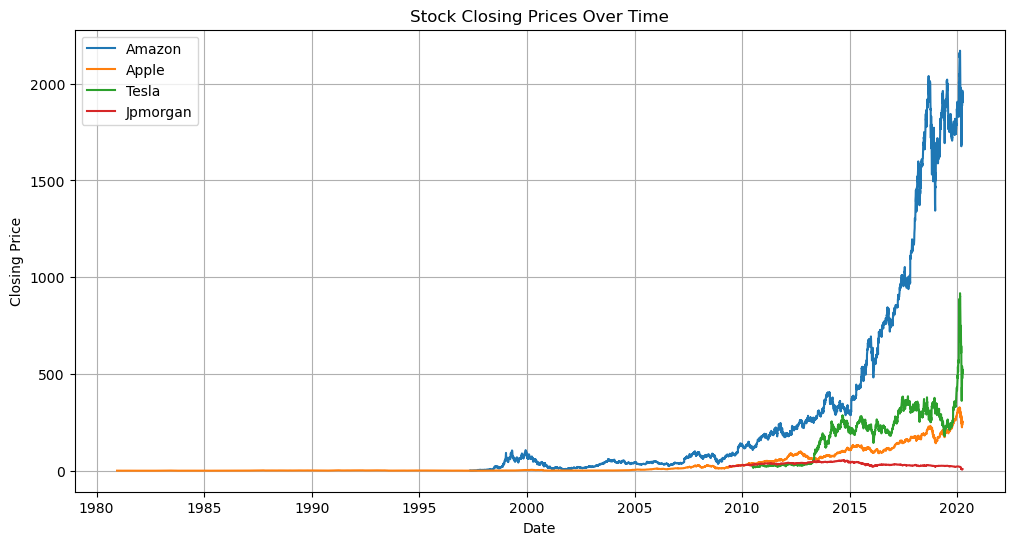

In [204]:
plt.figure(figsize=(12, 6))
for stock, df in stocks.items():
    plt.plot(df['Date'], df['Close'], label=stock.capitalize())
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Closing Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

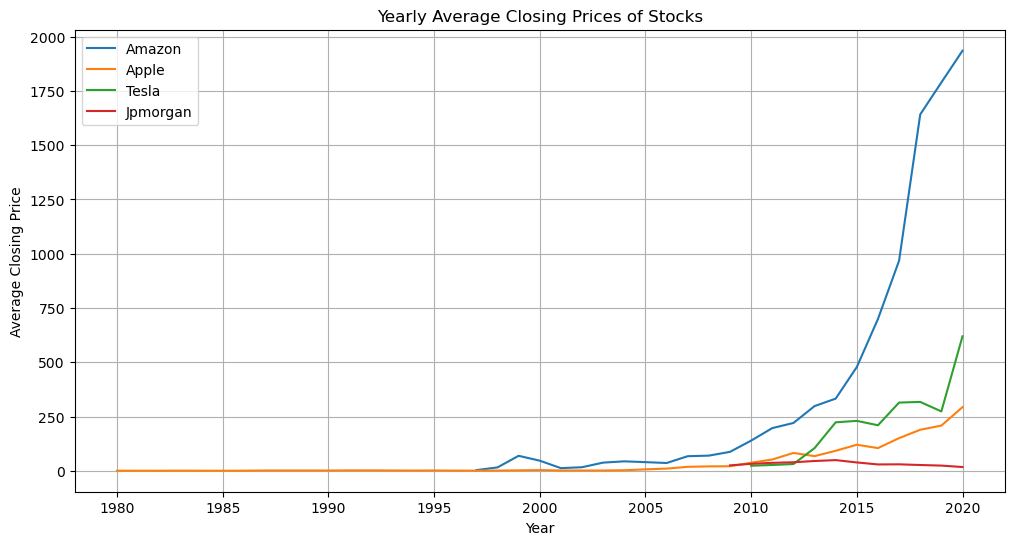

In [205]:

plt.figure(figsize=(12, 6))
for stock, df in stocks.items():
    yearly_mean = df.groupby('year').mean()
    plt.plot(yearly_mean.index, yearly_mean['Close'], label=stock.capitalize())
plt.xlabel("Year")
plt.ylabel("Average Closing Price")
plt.title("Yearly Average Closing Prices of Stocks")
plt.legend()
plt.grid(True)
plt.show()

In [206]:
import math
maximum_stock = -math.inf
max_stock = None
for stock, df in stocks.items():
    print(f"{stock} : {df['Close'].min()}, {df['Close'].max()}")
    maximum_stock = max(maximum_stock, df['Close'].max())
    if maximum_stock == df['Close'].max():
        max_stock = stock
print("maximum stock price is found in ", stock)

amazon : 1.3958333730697632, 2170.219970703125
apple : 0.1964285671710968, 327.20001220703125
tesla : 15.800000190734863, 917.4199829101562
jpmorgan : 6.900000095367432, 53.93000030517578
maximum stock price is found in  jpmorgan


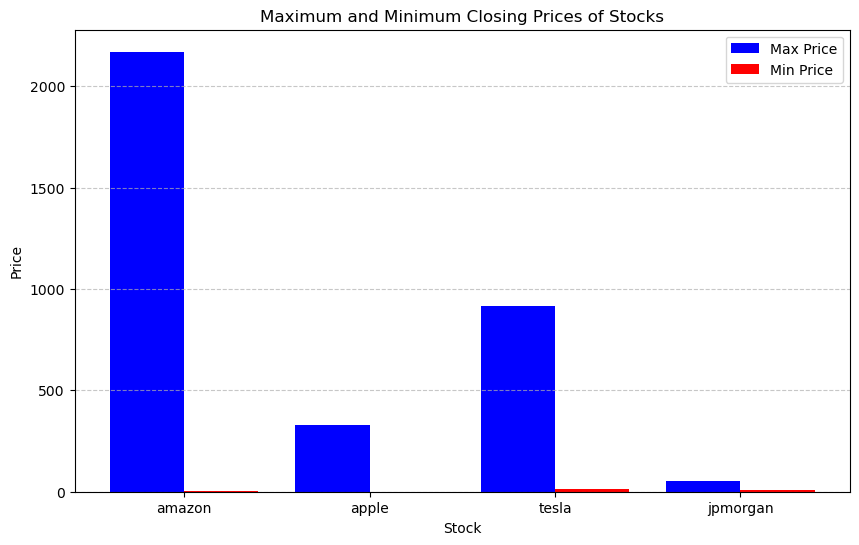

In [207]:
import numpy as np
max_prices = {stock: df['Close'].max() for stock, df in stocks.items()}
min_prices = {stock: df['Close'].min() for stock, df in stocks.items()}
x = np.arange(len(stocks))
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, max_prices.values(), width=0.4, label="Max Price", color='blue')
plt.bar(x + 0.2, min_prices.values(), width=0.4, label="Min Price", color='red')
plt.xticks(x, stocks.keys())
plt.xlabel("Stock")
plt.ylabel("Price")
plt.title("Maximum and Minimum Closing Prices of Stocks")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [208]:
volatile = {}
most_volatile = None
v = -math.inf
for i in max_prices:
    volatile[i] = max_prices[i] - min_prices[i]
    if volatile[i] > v:
        v = volatile[i]
        most_volatile = i
print("The most volatile stock is", most_volatile)
    

The most volatile stock is amazon


In [209]:
for stock, df in stocks.items():
    print(f"\nTop 5 Highest Volume Days for {stock.capitalize()}:")
    print(df[['Date', 'Volume']].nlargest(5, 'Volume'))



Top 5 Highest Volume Days for Amazon:
           Date     Volume
2500 2007-04-25  104329200
401  1998-12-16  101797200
386  1998-11-24   81675600
598  1999-09-29   79374400
2313 2006-07-26   76985200

Top 5 Highest Volume Days for Apple:
           Date      Volume
5003 2000-09-29  1855410200
4208 1997-08-06  1047620000
4209 1997-08-07   938859600
6839 2008-01-23   843242400
4743 1999-09-21   839389600

Top 5 Highest Volume Days for Tesla:
           Date    Volume
2416 2020-02-04  60938800
2417 2020-02-05  48423800
2415 2020-02-03  47233500
2418 2020-02-06  39880800
723  2013-05-14  37163900

Top 5 Highest Volume Days for Jpmorgan:
           Date    Volume
1641 2015-12-07  18160200
1643 2015-12-09  12738400
1665 2016-01-12  11929400
1673 2016-01-25  11702900
2711 2020-03-10  11680800


In [210]:
for stock, df in stocks.items():
    print(len(stocks[stock]), (stocks[stock]['Adj Close'] == stocks[stock]['Close']).count())

5758 5758
9909 9909
2457 2457
2728 2728


In [211]:
for stock in stocks:
    stocks[stock] = stocks[stock].drop('Adj Close', axis = 1)

In [212]:
stocks['amazon'].columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'year'], dtype='object')

In [213]:
for stock, df in stocks.items():
    stocks[stock].set_index('Date', inplace = True)

In [229]:
for stock, df in stocks.items():
    stocks[stock]['Tomorrow'] = stocks[stock]['Close'].shift(-1)

In [230]:
for stock, df in stocks.items():
    stocks[stock]['Target'] = (stocks[stock]['Tomorrow'] > stocks[stock]['Close']).astype(int)

In [231]:
for stock, df in stocks.items():
    print(df.head())

                Open      High       Low     Close    Volume  year  Tomorrow  \
Date                                                                           
1997-05-15  2.437500  2.500000  1.927083  1.958333  72156000  1997  1.729167   
1997-05-16  1.968750  1.979167  1.708333  1.729167  14700000  1997  1.708333   
1997-05-19  1.760417  1.770833  1.625000  1.708333   6106800  1997  1.635417   
1997-05-20  1.729167  1.750000  1.635417  1.635417   5467200  1997  1.427083   
1997-05-21  1.635417  1.645833  1.375000  1.427083  18853200  1997  1.395833   

            Target  
Date                
1997-05-15       0  
1997-05-16       0  
1997-05-19       0  
1997-05-20       0  
1997-05-21       0  
                Open      High       Low     Close     Volume  year  Tomorrow  \
Date                                                                            
1980-12-12  0.513393  0.515625  0.513393  0.513393  117258400  1980  0.486607   
1980-12-15  0.488839  0.488839  0.486607  0.48660

In [217]:
for stock, df in stocks.items():
    print(f"{stock}\n", stocks[stock]['Target'].value_counts())

amazon
 Target
1    2917
0    2841
Name: count, dtype: int64
apple
 Target
0    5019
1    4890
Name: count, dtype: int64
tesla
 Target
1    1252
0    1205
Name: count, dtype: int64
jpmorgan
 Target
1    1390
0    1338
Name: count, dtype: int64


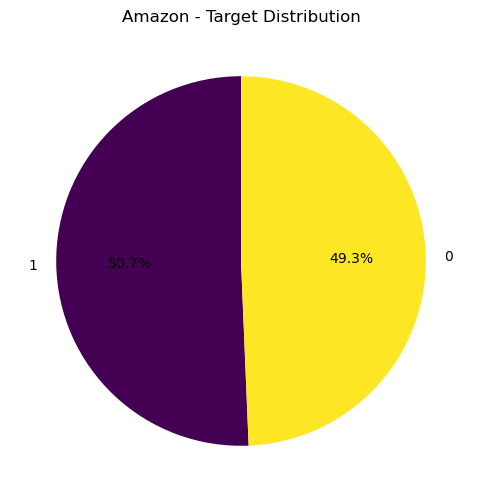

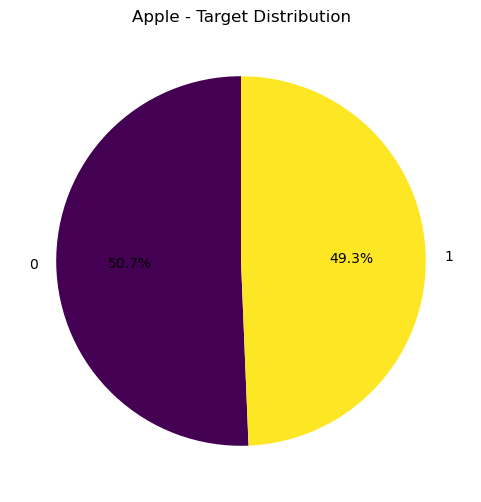

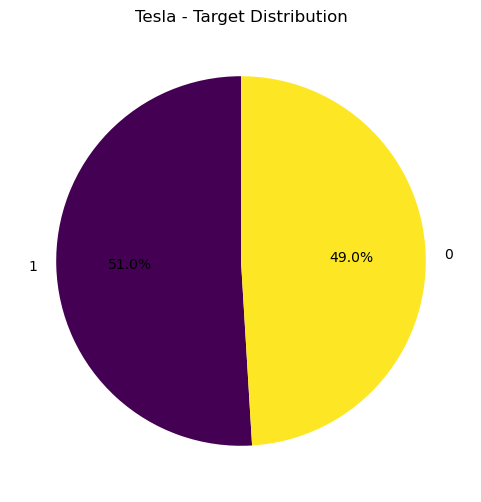

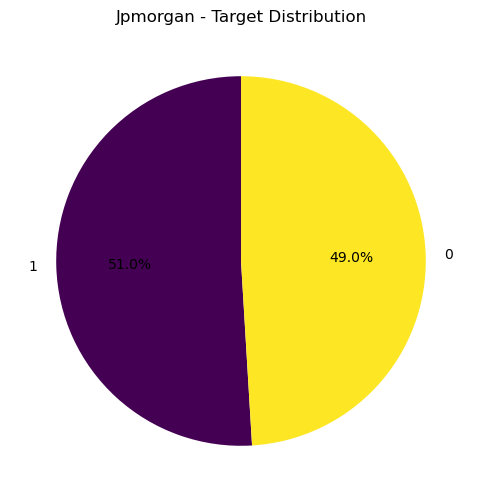

In [218]:
for stock, df in stocks.items():
    plt.figure(figsize=(6, 6))
    stocks[stock]['Target'].value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, colormap='viridis'
    )
    plt.title(f"{stock.capitalize()} - Target Distribution")
    plt.ylabel('')
    plt.show()


In [219]:
etfs = pd.read_csv("stock-market-dataset/etfs/BBCA.csv")

In [220]:
etfs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-27,0.828000,0.828000,0.821000,0.823000,0.788199,0
1,2018-08-09,24.709999,24.709999,24.709999,24.709999,23.665136,0
2,2018-08-10,24.730000,24.730000,24.730000,24.730000,23.684292,200
3,2018-08-13,24.580000,24.629999,24.480000,24.540001,23.502329,6120300
4,2018-08-14,24.680000,24.870001,24.680000,24.870001,23.818373,18982500


In [223]:
etfs['Date'] = pd.to_datetime(etfs['Date'], errors = 'coerce')

In [225]:
print("JPMorgan Stock Columns:", stocks['jpmorgan'].columns)
print("ETFs Columns:", etfs.columns)


JPMorgan Stock Columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'year', 'Tomorrow', 'Target'], dtype='object')
ETFs Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [232]:
stocks['jpmorgan'].reset_index(inplace=True)

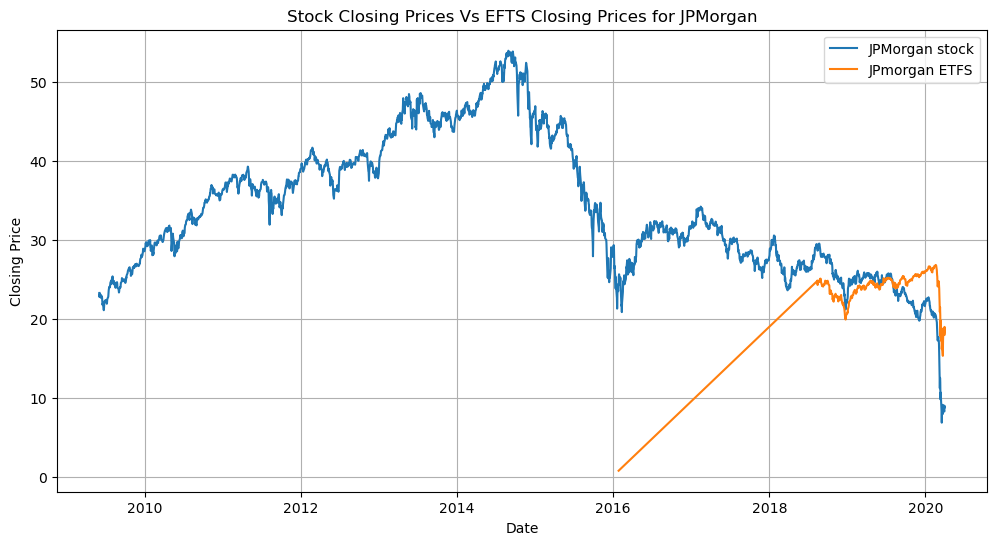

In [233]:
plt.figure(figsize=(12, 6))
plt.plot(stocks['jpmorgan']['Date'], stocks['jpmorgan']['Close'], label = "JPMorgan stock")
plt.plot(etfs['Date'], etfs['Close'], label="JPmorgan ETFS")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Closing Prices Vs EFTS Closing Prices for JPMorgan")
plt.legend()
plt.grid(True)
plt.show()